In [15]:
import os
import warnings
warnings.filterwarnings("ignore")

import pandas as pd

import torch
from torch.nn import Linear, MSELoss
from torch.optim import SGD

from helper_functions import fit, evaluate_model, scale_data, draw_epochs_losses

In [ ]:
print(os.listdir("../Data/Input"))

['Life Expectancy Data.csv', 'test.csv', 'train.csv']


# **1 &nbsp;&nbsp;&nbsp; Load Data**

In [ ]:
train_df = pd.read_csv("../Data/Input/Train/train.csv")
test_df = pd.read_csv("../Data/Input/Test/test.csv")

# **2 &nbsp;&nbsp;&nbsp; Standardize Data**

In [18]:
# Get the features and target
single_feature_train = train_df["Income composition of resources"]
single_feature_test = test_df["Income composition of resources"]

single_target_train = train_df["Life expectancy "]
single_target_test = test_df["Life expectancy "]

In [19]:
# Convert to tensor
X_single_train = torch.tensor(single_feature_train.values, dtype=torch.float32).view(-1, 1)
y_single_train = torch.tensor(single_target_train.values, dtype=torch.float32).view(-1, 1)

X_single_test = torch.tensor(single_feature_test.values, dtype=torch.float32).view(-1, 1)
y_single_test = torch.tensor(single_target_test.values, dtype=torch.float32).view(-1, 1)

In [20]:
# Scale Data
X_single_train = scale_data(X_single_train)
y_single_train = scale_data(y_single_train)

X_single_test = scale_data(X_single_test)
y_single_test = scale_data(y_single_test)

# **3 &nbsp;&nbsp;&nbsp; Declare Model**

In [21]:
single_model = Linear(in_features=X_single_train.shape[1], out_features=1)
for param in single_model.parameters():
    print(param)

Parameter containing:
tensor([[0.9222]], requires_grad=True)
Parameter containing:
tensor([0.9538], requires_grad=True)


# **4 &nbsp;&nbsp;&nbsp; Train Model**

In [22]:
single_model, single_epochs_losses = fit(
    single_model,
    criterion=MSELoss(),
    optimizer=SGD(single_model.parameters(), lr=0.01),
    train_data=X_single_train,
    train_target=y_single_train,
    epochs=2000,
    n_iter_not_change=500,
    lr_decay=0.1,
)

Epoch [1/2000], Loss: 1.2371, LR: 0.01000
Epoch [100/2000], Loss: 0.3350, LR: 0.01000
Epoch [200/2000], Loss: 0.3184, LR: 0.01000
Epoch [300/2000], Loss: 0.3182, LR: 0.01000
Epoch [400/2000], Loss: 0.3182, LR: 0.01000
Epoch [500/2000], Loss: 0.3182, LR: 0.01000
Epoch [600/2000], Loss: 0.3182, LR: 0.00100
Epoch [700/2000], Loss: 0.3182, LR: 0.00100
Epoch [800/2000], Loss: 0.3182, LR: 0.00100
Epoch [900/2000], Loss: 0.3182, LR: 0.00100
Epoch [1000/2000], Loss: 0.3182, LR: 0.00100
Epoch [1100/2000], Loss: 0.3182, LR: 0.00010
Epoch [1200/2000], Loss: 0.3182, LR: 0.00010
Epoch [1300/2000], Loss: 0.3182, LR: 0.00010
Epoch [1400/2000], Loss: 0.3182, LR: 0.00010
Epoch [1500/2000], Loss: 0.3182, LR: 0.00010
Epoch [1600/2000], Loss: 0.3182, LR: 0.00001
Epoch [1700/2000], Loss: 0.3182, LR: 0.00001
Epoch [1800/2000], Loss: 0.3182, LR: 0.00001
Epoch [1900/2000], Loss: 0.3182, LR: 0.00001
Epoch [2000/2000], Loss: 0.3182, LR: 0.00001


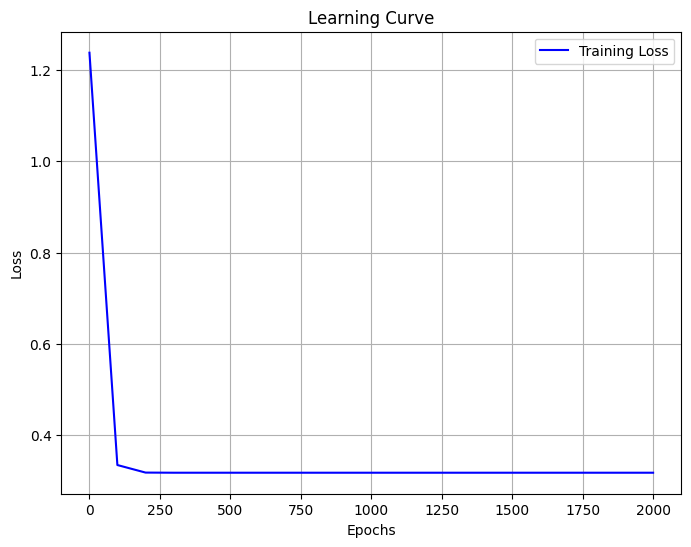

In [23]:
draw_epochs_losses(single_epochs_losses)

# **5 &nbsp;&nbsp;&nbsp; Evaluate Model**

In [24]:
single_loss = evaluate_model(
    single_model,
    criterion=MSELoss(),
    test_data=X_single_test,
    test_target=y_single_test
)

print("Model loss:", single_loss.item())

Model loss: 0.3017900288105011


In [25]:
print("Model weights:", single_model.weight)
print("Model bias:", single_model.bias)

Model weights: Parameter containing:
tensor([[0.8257]], requires_grad=True)
Model bias: Parameter containing:
tensor([1.2158e-05], requires_grad=True)


# **6 &nbsp;&nbsp;&nbsp; Write to File**

In [ ]:
torch.save(single_model.state_dict(), "../Data/Output/SingleFeatureModel/single_feature_model.pth")